In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.lines as mlines
from scipy.io import readsav
from scipy import ndimage
import matplotlib.transforms as mtransforms
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker
# import math
import glob as glob
import seaborn as sns
import random

from scipy.signal import savgol_filter
from scipy.interpolate import CubicSpline

# PyMC 4.0 imports
import pymc as pm
import aesara.tensor as at 
import aesara
import arviz as az
import pymc.sampling_jax
import pytensor.tensor as pt
import pytensor

import sys
sys.path.append('../')

from scipy import stats

import os

from funciones.opencube2 import opencube2
from funciones.func4 import tilt,elong,MFLUX,barys,set_ranges
from funciones.modelcube import modelmag,modelmagf,modelmag2

from scipy.stats import skew

In [74]:
DF0=pd.read_csv('./arangos6.csv')

DFb1=[]
for name in DF0.AR.values:
#for name in [8404]:

    nn=DF0[DF0['AR']==name].range.values[0]
    sg0=DF0[DF0['AR']==name].sigma.values[0]
    name=str(name)
    print(name+'----------------------------------')
    datad,times=opencube2(name=name,path='../movies')
    scl=1
    
    mask_cube=np.load('./masks/'+name+'_mask.npy')[:,:,0:nn]
    data2=datad[:,:,0:nn]*mask_cube
    sz2,sz1,nMagnetograms = (np.shape(data2))
    pixsize=1.98*725*1000*100
    pixarea=pixsize*pixsize
    
    if nn >=50:
        data2=data2[:,:,::3]
        mask_cube=mask_cube[:,:,::3]
    if (nn >=25) and (nn<50):
        data2=data2[:,:,::2]
        mask_cube=mask_cube[:,:,::2]
    sz2,sz1,nMagnetograms = (np.shape(data2))        
    print('# of magnetograms ',nMagnetograms)


    bb = [barys(np.abs(data2[:,:,i]),0) for i in range(nMagnetograms)]
    xc2=[bb[i][0] for i in range(nMagnetograms)]
    yc2=[bb[i][1] for i in range(nMagnetograms)]
    
#    sg0=np.mean([np.std(vec[:,:,j]*(vec[:,:,j]!=0)) for j in range(nMagnetograms)])
  #  sg0=260
     

    ranges = set_ranges(data2)
    ranges['da']=[0,1]
    hem=ranges['hem']
    
    post=pd.read_csv('./posteriors/'+name+'_TM3.csv')
    bad={}    
    for j in np.arange(post['mag'].max()+1):
        post1=post[post['mag']==j]

        for pt in ['a','R','axf','alpha']:
            pp=1
            if pt == 'axf':
                pp=pixarea
            if (pp*post1[pt].mean()+4*pp*post1[pt].std()>ranges[pt][1]) and (skew(post1[pt])) < -1:
                bad[pt]={'top':True}
            if (pp*post1[pt].mean()-4*pp*post1[pt].std()<ranges[pt][0]) and (skew(post1[pt])) > 1:
                bad[pt]={'bottom':True}
                
    DFx=pd.DataFrame(bad)
    DFx=DFx.assign(AR=name)
    DFb1.append(DFx)
    
DFb1=pd.concat(DFb1)
DFb1[DFb1.keys()[1:]]=DFb1[DFb1.keys()[1:]].notna()

#DFb1[DFb1.keys()[0]]=DFb1[DFb1.keys()[0]].notna()
#DFb1[DFb1.keys()[2:]]=DFb1[DFb1.keys()[2:]].notna()

9368----------------------------------
185 207 68
b'4-Mar-2001 04:47:01.475' b'8-Mar-2001 17:36:01.575'
84 158
# of magnetograms  21


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9396----------------------------------
133 149 40
b'24-Mar-2001 04:48:02.038' b'26-Mar-2001 20:48:02.112'
82 103
# of magnetograms  20


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9399----------------------------------
135 131 48
b'24-Mar-2001 08:00:02.042' b'27-Mar-2001 12:48:02.130'
60 98
# of magnetograms  21


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9417----------------------------------
131 165 61
b'5-Apr-2001 17:36:02.336' b'9-Apr-2001 19:12:02.418'
72 117
# of magnetograms  19


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9432----------------------------------
165 141 68
b'18-Apr-2001 04:48:02.561' b'22-Apr-2001 17:36:02.602'
95 105
# of magnetograms  21


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9441----------------------------------
185 185 66
b'28-Apr-2001 11:12:02.600' b'2-May-2001 22:24:02.564'
120 137
# of magnetograms  18


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9455----------------------------------
173 199 67
b'10-May-2001 19:12:02.467' b'15-May-2001 08:00:02.399'
73 178
# of magnetograms  20


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9456----------------------------------
117 143 48
b'11-May-2001 12:48:02.457' b'14-May-2001 19:12:02.408'
67 126
# of magnetograms  22


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9484----------------------------------
195 209 68
b'2-Jun-2001 04:51:01.960' b'6-Jun-2001 17:35:01.838'
91 165
# of magnetograms  23


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9511----------------------------------
159 171 68
b'22-Jun-2001 15:59:01.514' b'27-Jun-2001 04:51:01.431'
76 122
# of magnetograms  24


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9512----------------------------------
211 193 69
b'21-Jun-2001 22:27:01.528' b'26-Jun-2001 12:51:01.443'
79 131
# of magnetograms  24


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9531----------------------------------
131 127 67
b'8-Jul-2001 04:48:01.297' b'12-Jul-2001 17:39:01.284'
68 97
# of magnetograms  23


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9548----------------------------------
143 163 68
b'20-Jul-2001 07:59:01.280' b'24-Jul-2001 20:51:01.262'
78 107
# of magnetograms  14
9563----------------------------------
131 155 68
b'3-Aug-2001 03:11:01.251' b'7-Aug-2001 16:03:01.268'
86 127
# of magnetograms  23


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9569----------------------------------
149 143 49
b'5-Aug-2001 15:59:01.258' b'8-Aug-2001 22:23:01.276'
55 92
# of magnetograms  25


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9574----------------------------------
135 153 49
b'10-Aug-2001 03:15:01.285' b'13-Aug-2001 09:35:01.316'
53 112
# of magnetograms  25


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9660----------------------------------
143 151 60
b'10-Oct-2001 06:23:02.457' b'14-Oct-2001 06:23:02.514'
50 102
# of magnetograms  17
9678----------------------------------
149 187 56
b'25-Oct-2001 04:47:02.530' b'28-Oct-2001 22:23:02.497'


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


80 145
# of magnetograms  19
9689----------------------------------
139 127 58
b'4-Nov-2001 08:03:02.421' b'8-Nov-2001 08:03:02.363'
65 80
# of magnetograms  17
9710----------------------------------
153 179 69
b'20-Nov-2001 00:00:02.093' b'24-Nov-2001 14:24:01.951'
76 133
# of magnetograms  22


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9748----------------------------------
179 207 66
b'21-Dec-2001 01:36:01.303' b'25-Dec-2001 14:27:01.223'
97 146
# of magnetograms  22


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9764----------------------------------
135 151 65
b'27-Dec-2001 23:59:01.189' b'1-Jan-2002 08:03:00.148'
76 107
# of magnetograms  22


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9844----------------------------------
153 213 68
b'24-Feb-2002 01:36:00.483' b'28-Feb-2002 14:24:00.593'
80 143
# of magnetograms  22


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9845----------------------------------
163 215 68
b'27-Feb-2002 06:24:00.558' b'3-Mar-2002 19:12:00.686'
110 185
# of magnetograms  20


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9873----------------------------------
149 153 46
b'15-Mar-2002 06:24:01.037' b'18-Mar-2002 12:48:01.123'
65 83
# of magnetograms  19


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9880----------------------------------
143 157 51
b'23-Mar-2002 00:00:01.228' b'26-Mar-2002 09:36:01.301'
77 107
# of magnetograms  17


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9884----------------------------------
135 185 63
b'27-Mar-2002 20:48:01.332' b'1-Apr-2002 03:12:01.421'
60 106
# of magnetograms  21


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9897----------------------------------
145 163 39
b'6-Apr-2002 03:12:01.514' b'8-Apr-2002 20:48:01.552'
66 90
# of magnetograms  15
9906----------------------------------
159 205 69
b'12-Apr-2002 11:12:01.585' b'17-Apr-2002 01:35:43.000'
98 154
# of magnetograms  23


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9910----------------------------------
161 161 52
b'17-Apr-2002 11:12:01.591' b'20-Apr-2002 22:24:01.572'
86 136
# of magnetograms  15


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9912----------------------------------
141 135 68
b'18-Apr-2002 17:36:01.586' b'23-Apr-2002 06:24:01.551'
97 114
# of magnetograms  23


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9931----------------------------------
147 165 64
b'1-May-2002 01:35:01.461' b'5-May-2002 09:35:01.399'
60 117
# of magnetograms  17
9978----------------------------------
159 181 68
b'3-Jun-2002 06:27:00.696' b'7-Jun-2002 19:15:00.609'
104 135
# of magnetograms  19


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9987----------------------------------
191 189 64
b'6-Jun-2002 17:35:00.629' b'11-Jun-2002 00:00:00.549'
65 146
# of magnetograms  22


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


In [75]:
DFb1

,AR,axf,a
bottom,9748,True,True


In [18]:
DFb1

,a,AR,axf,R
bottom,True,8722,False,False
top,False,8795,True,False
bottom,True,8795,False,False
bottom,True,8839,False,False
top,False,8924,False,True
bottom,False,8924,True,False
top,False,9088,True,False
top,False,9161,True,False
bottom,False,9311,True,False
bottom,True,9353,False,False


In [5]:
for names in list(set(DFb['AR'].values)):
    DF1=DFb[DFb['AR']==names]
    rango={}
    if len(DF1['AR'].index) <2:
        for pt in ['a','R','axf','alpha']:
            if DF1['AR'].index[0] == 'top':
                rango[pt]=[0,1*DF1[pt].values[0]]
            if DF1['AR'].index[0] == 'bottom':
                rango[pt]=[1*DF1[pt].values[0],0]
        
    if len(DF1['AR'].index) >1:
        for pt in ['a','R','axf','alpha']:
            rango[pt]=[1*DF1[pt].values[1],1*DF1[pt].values[0]]
                
    print(names,rango)

NameError: name 'DFb' is not defined

In [72]:
DFb1.to_csv('corr_rangos6b.csv')


In [19]:
for j in np.arange(post['mag'].max()+1):
    post1=post[post['mag']==j]
    for pt in ['a','R','axf','da','alpha']:
        pp=1
        if pt == 'axf':
            pp=pixarea
        if pp*post1[pt].mean()+4*post1[pt].std()>ranges[pt][1]:
            print(name,j,pt,'BAD')
        if pp*post1[pt].mean()-4*post1[pt].std()<ranges[pt][0]:
            print(name,j,pt,'BAD')        
        

In [38]:
if DFb1[DFb1['AR']=='8795']['R'].values:
    print(1)

1


In [77]:
name2=DFb1['AR'].values

In [62]:
name2

array(['8795', '8839', '8839', '9088', '9161', '9353'], dtype=object)

In [50]:
DFb1.keys()

Index(['AR', 'axf', 'a', 'alpha', 'R'], dtype='object')

9748**********************


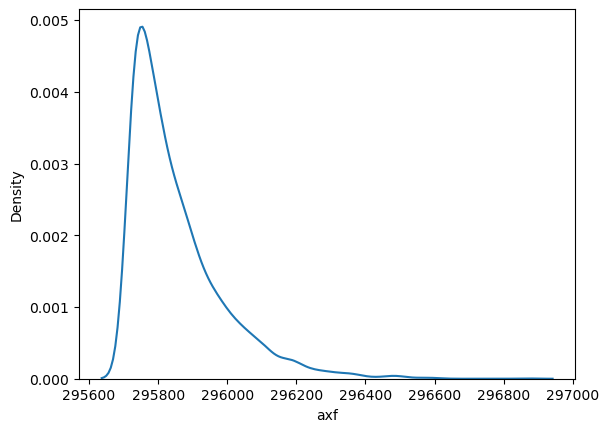

9748**********************


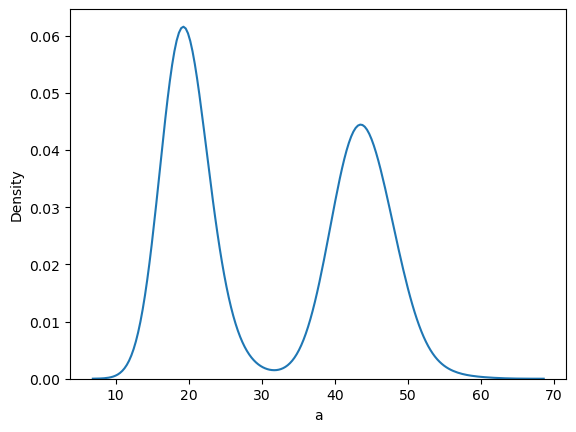

In [78]:
for nm in name2:
    post=pd.read_csv('./posteriors/'+nm+'_TM3.csv')
    for pp in DFb1.keys()[1:]:
        for ap in DFb1[DFb1['AR']==nm][pp].values:
            if ap:
                print(nm+'**********************')
                sns.kdeplot(post[post['mag']==0][pp])
                plt.show()


In [55]:
DFb1[DFb1['AR']==nm][pp].values

array([ True, False])

In [108]:
post=pd.read_csv('./posteriors/8649_TM3.csv')

In [109]:
skew(post[post['mag']==0]['axf'])

2.1675759080135153

<AxesSubplot: xlabel='R', ylabel='Density'>

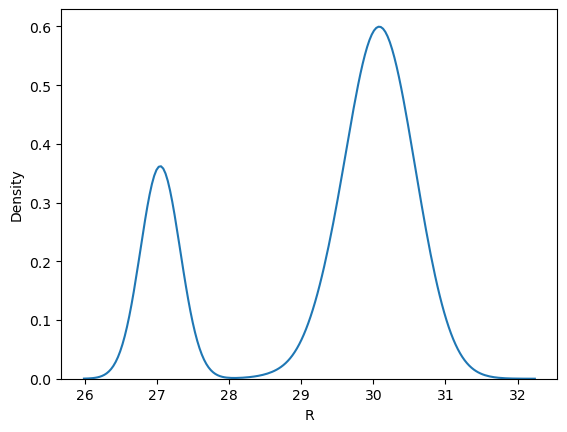

In [111]:
sns.kdeplot(post[post['mag']==0]['R'])

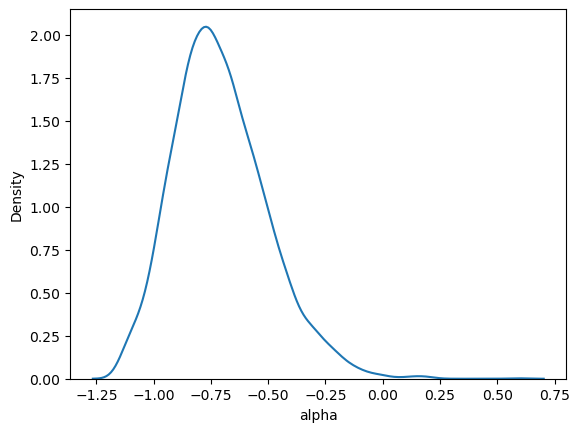

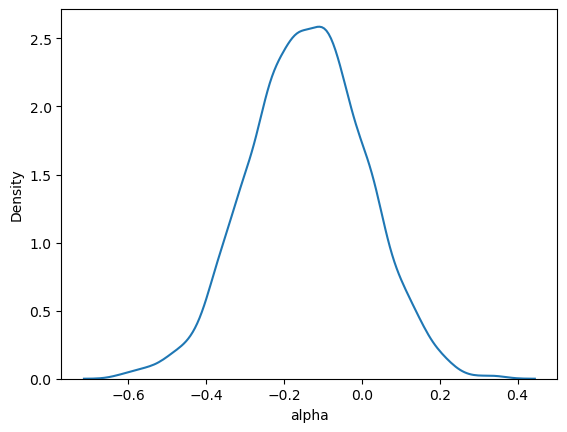

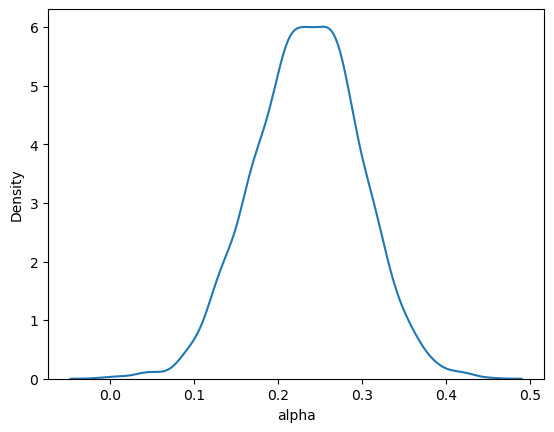

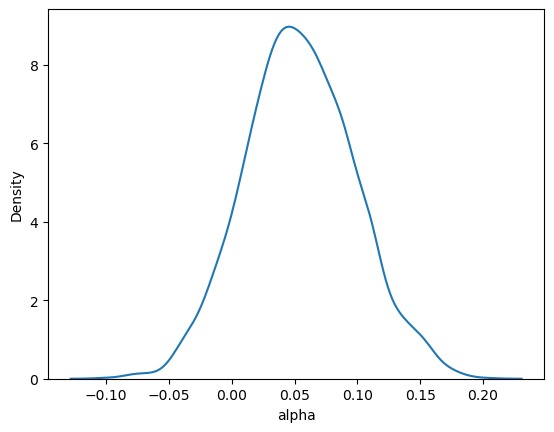

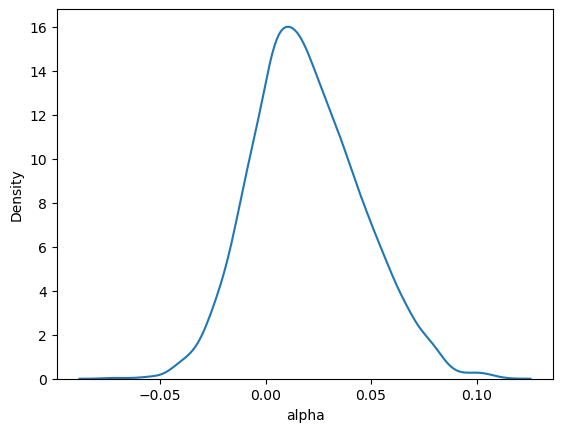

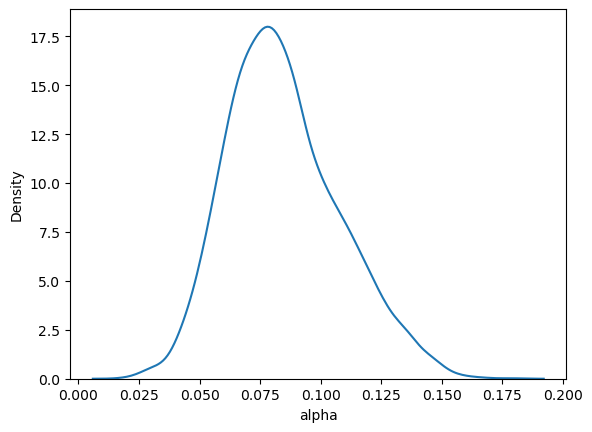

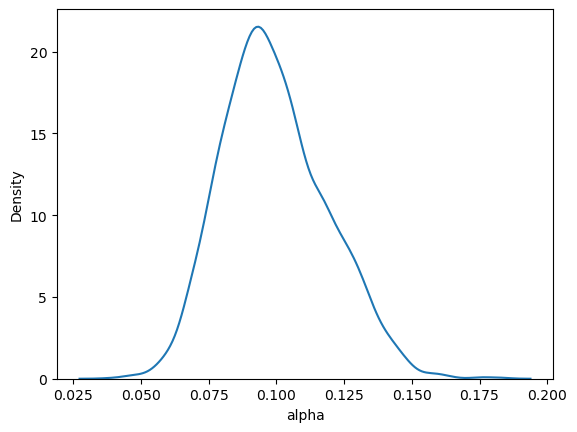

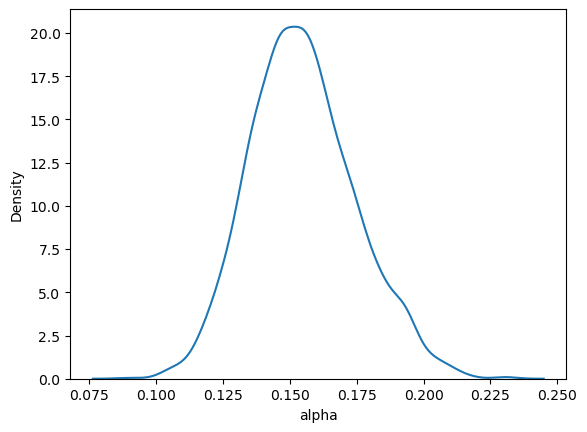

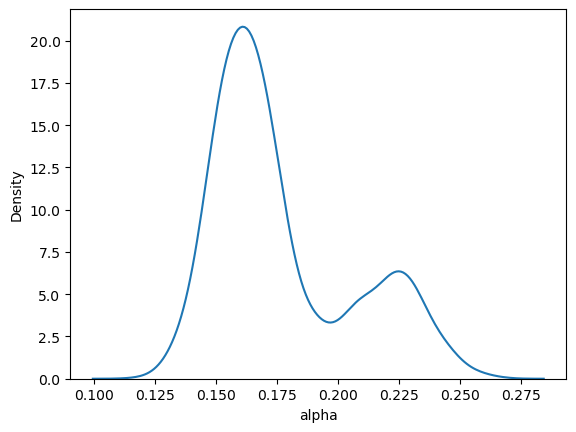

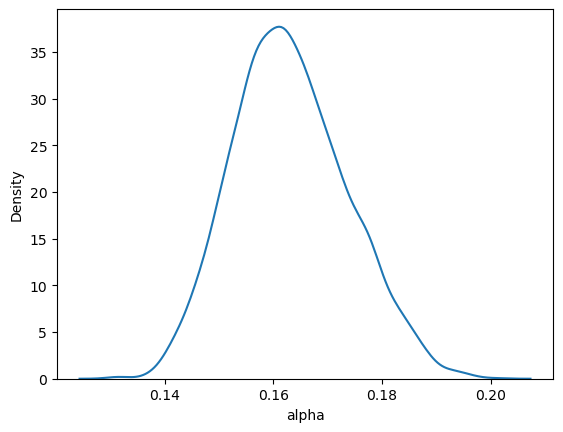

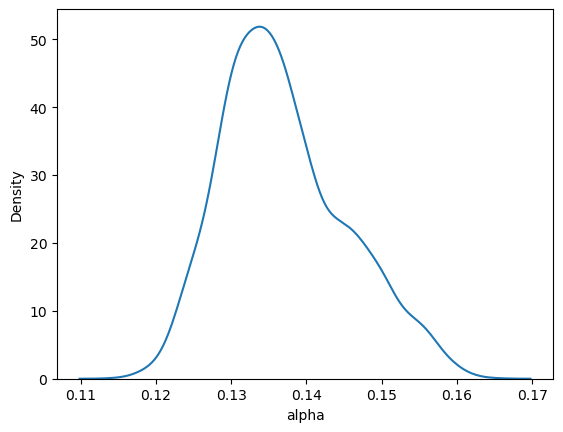

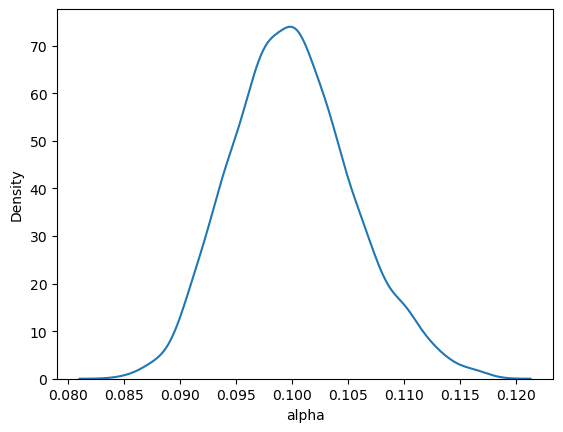

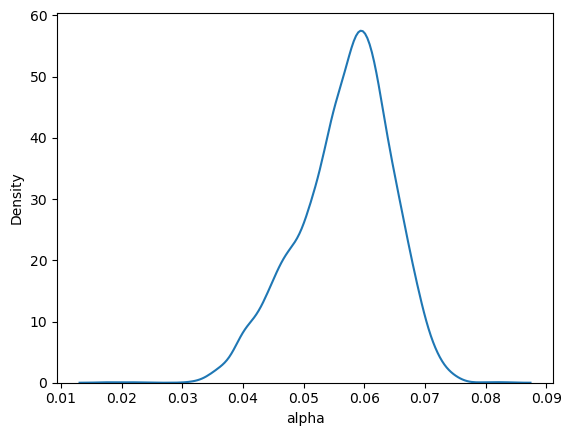

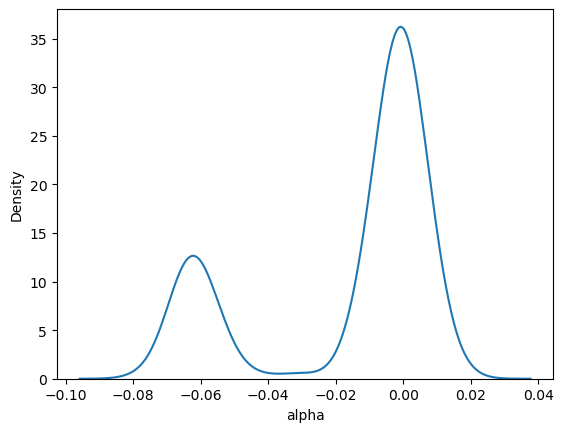

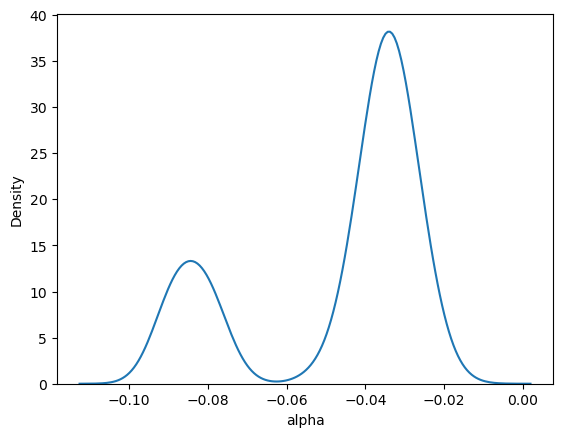

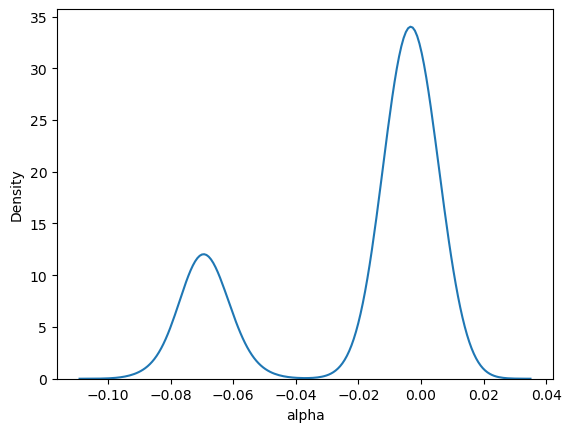

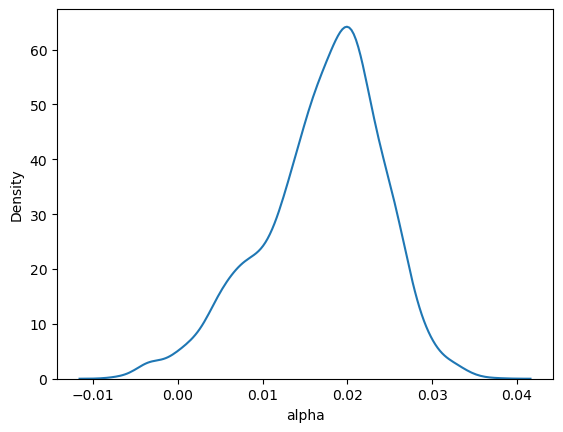

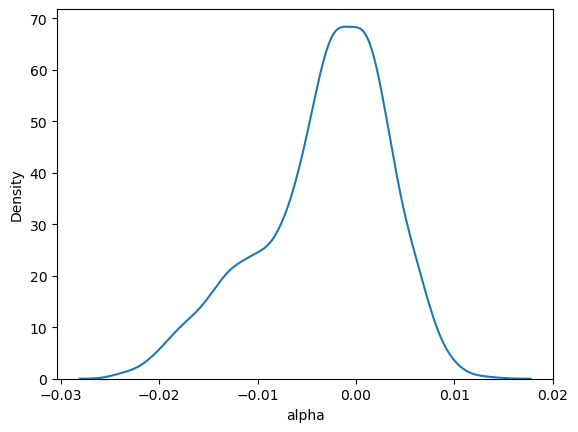

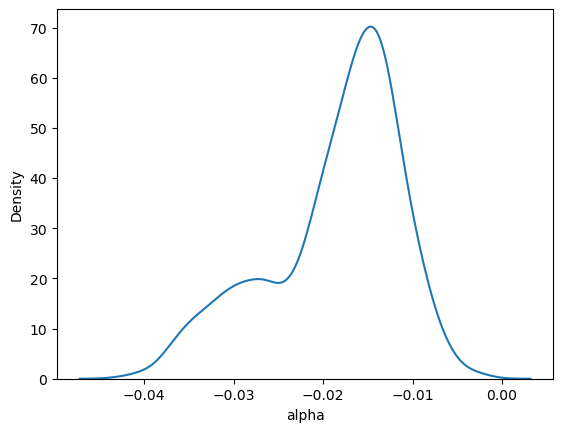

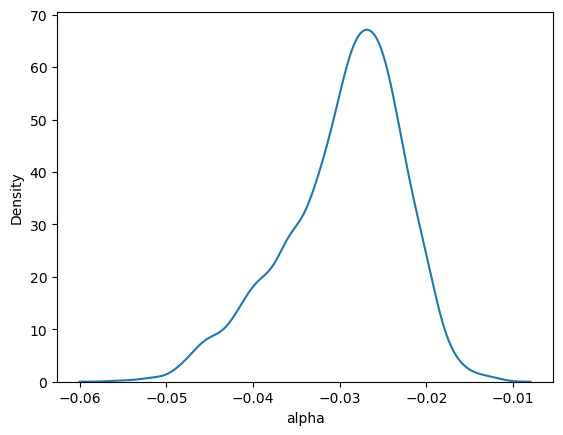

In [92]:
for j in range(20):
    sns.kdeplot(post[post['mag']==j]['alpha'])
    plt.show()

In [8]:
from scipy.stats import norm, kurtosis

In [14]:
kurtosis(post[post['mag']==0]['a'])

4.182807520216363